In [ ]:
pip install matplotlib-venn

In [1]:
# Dependencies and Setup
import pandas as pd
# import demoji

import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
# File to Load
chart_path = "spotify_charts.csv"

# Read Chart Data File and store into Pandas DataFrames
chart_data = pd.read_csv(chart_path, encoding='utf-8')

In [2]:
#remove global from the regions column
regional_df = chart_data[chart_data["region"] != "Global"]

In [3]:
#count countries
len(regional_df['region'].unique())

68

In [4]:
#create new df based on region
top_countries = regional_df.groupby(['region'])[['total streams','artist']].sum()

#sort df to find top streaming countries
sorted_countries = top_countries.sort_values('total streams', ascending = False)

#variable for top ten countries
top_ten = sorted_countries.head(10)
top_ten

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_32635/1800081862.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_countries = regional_df.groupby(['region'])[['total streams','artist']].sum()


,total streams
region,
United States,1.421321e+11
Brazil,5.586668e+10
Mexico,4.559591e+10
Germany,3.995627e+10
United Kingdom,3.640880e+10
Spain,2.706220e+10
Italy,2.559113e+10
France,2.386987e+10
Australia,2.012821e+10


In [21]:
type(top_ten)

pandas.core.frame.DataFrame

In [22]:
top_ten.index

Index(['United States', 'Brazil', 'Mexico', 'Germany', 'United Kingdom',
       'Spain', 'Italy', 'France', 'Australia', 'Argentina'],
      dtype='object', name='region')

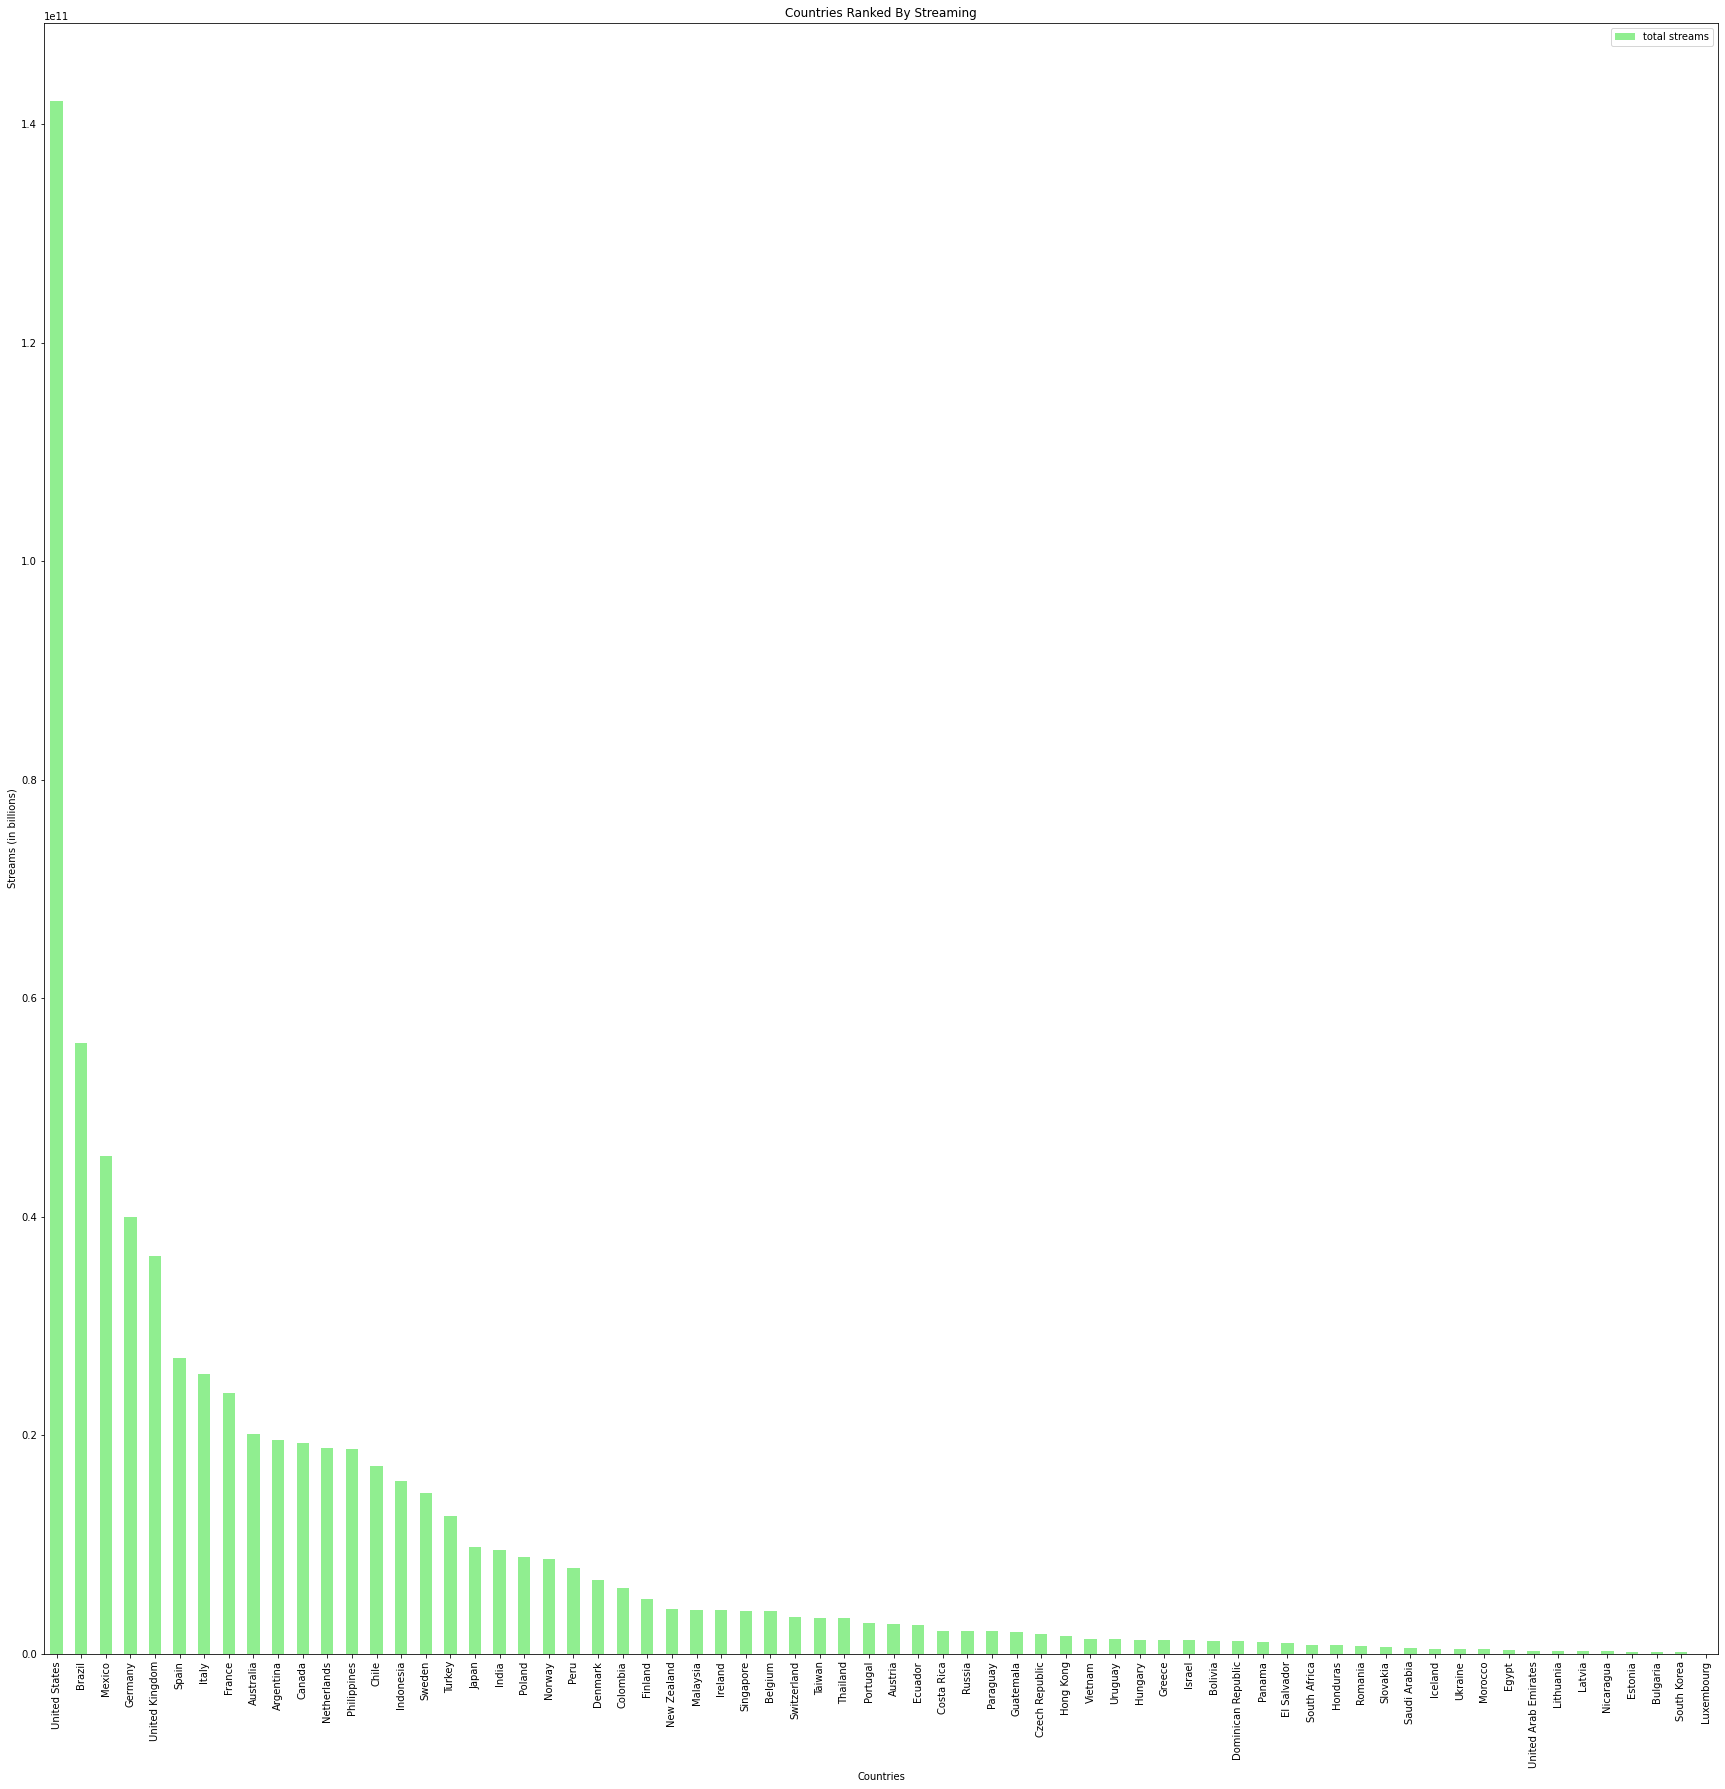

In [6]:
#create bar plot to show all countries streams 
sorted_countries_plot = sorted_countries.plot.bar(y='total streams', figsize =(30,30), width=.5, alpha=1, align="center", color = "lightgreen")

#adds title to bar chart  
plt.title("Countries Ranked By Streaming")

#label xaxis
plt.xlabel("Countries")

#lable yaxis
plt.ylabel("Streams (in billions)")

#rotate xticks to fit lables
plt.xticks(rotation = 90)

#export chart to pngs
plt.savefig("Countries_By_Streaming.png")

#show graph 
plt.show() 

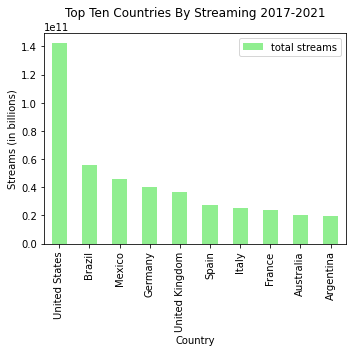

In [7]:
#create bar plot to show top 10 countries streams 
top_countries_plot = top_ten.plot.bar(y='total streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Top Ten Countries By Streaming 2017-2021")

#label xaxis
plt.xlabel("Country")

#lable yaxis
plt.ylabel("Streams (in billions)")

#top_countries_plot.bar_label(top_countries["total streams"], label_type='edge')

#adjust graph layout 
plt.tight_layout()

#export chart to pngs
plt.savefig("Top_Ten_Countries_by_Streaming.png")

#show graph 
plt.show()

In [8]:
#Find total streams for US
us = chart_data.loc[chart_data["region"] == "United States"]

#sum total streams
us_streaming = us["total streams"].sum()

#Find total streams overall
overall = chart_data.loc[chart_data["region"] == "Global"]

#Sum total streams overall
overall_streaming = overall["total streams"].sum()

#Calcuate percent of streams that are from US
us_percent_streaming = (us_streaming/overall_streaming) * 100

#print streaming percentage
us_percent_streaming

print(f"The U.S. market makes up {us_percent_streaming}% of the total global Spotify streams from 2017-2021.")

The U.S. market makes up 32.35390255351552% of the total global Spotify streams from 2017-2021.


In [13]:
#create df for all songs from 2017
df_2017_all = chart_data[(chart_data["date"] == 2017)]

#sort df by total streams to find top ten
all_songs_2017 = df_2017_all.sort_values('total streams', ascending = False)

all_songs_2017

,date,title,artist,region,total streams
48188,2017,Shape of You,Ed Sheeran,Global,1.479857e+09
12958,2017,Despacito - Remix,"Luis Fonsi, Daddy Yankee, Justin Bieber",Global,9.085726e+08
12901,2017,Despacito (Featuring Daddy Yankee),Luis Fonsi,Global,7.391564e+08
50763,2017,Something Just Like This,"The Chainsmokers, Coldplay",Global,6.864717e+08
20887,2017,HUMBLE.,Kendrick Lamar,Global,6.504118e+08
...,...,...,...,...,...
36319,2017,Muy Personal (feat. J Balvin),Yandel,Panama,1.001000e+03
9634,2017,Chantaje (feat. Maluma),Shakira,Luxembourg,1.001000e+03
35602,2017,Mit Mondjak Még,Kowalsky Meg A Vega,Hungary,1.001000e+03
4270,2017,"Baby, You Make Me Crazy",Sam Smith,Hungary,1.001000e+03


In [14]:
#create df for all 
shape_of_you = all_songs_2017[(all_songs_2017["title"] == "Shape of You") & (chart_data["region"] != "Global")]
shape_of_you

/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_32635/3683089355.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  shape_of_you = all_songs_2017[(all_songs_2017["title"] == "Shape of You") & (chart_data["region"] != "Global")]


,date,title,artist,region,total streams
48223,2017,Shape of You,Ed Sheeran,United States,278916058.0
48222,2017,Shape of You,Ed Sheeran,United Kingdom,130658891.0
48187,2017,Shape of You,Ed Sheeran,Germany,96505235.0
48173,2017,Shape of You,Ed Sheeran,Brazil,95996545.0
48203,2017,Shape of You,Ed Sheeran,Mexico,86326454.0
48217,2017,Shape of You,Ed Sheeran,Sweden,63184448.0
48216,2017,Shape of You,Ed Sheeran,Spain,60057135.0
48211,2017,Shape of You,Ed Sheeran,Philippines,57245668.0
48204,2017,Shape of You,Ed Sheeran,Netherlands,55204354.0
48169,2017,Shape of You,Ed Sheeran,Australia,51174073.0


In [15]:
#sort df by total streams to find top ten
shape_sorted = shape_of_you.sort_values('total streams', ascending = False)

#save top ten rows by streaming 
shape_top = shape_sorted.head(10)

#print top ten 
shape_top

,date,title,artist,region,total streams
48223,2017,Shape of You,Ed Sheeran,United States,278916058.0
48222,2017,Shape of You,Ed Sheeran,United Kingdom,130658891.0
48187,2017,Shape of You,Ed Sheeran,Germany,96505235.0
48173,2017,Shape of You,Ed Sheeran,Brazil,95996545.0
48203,2017,Shape of You,Ed Sheeran,Mexico,86326454.0
48217,2017,Shape of You,Ed Sheeran,Sweden,63184448.0
48216,2017,Shape of You,Ed Sheeran,Spain,60057135.0
48211,2017,Shape of You,Ed Sheeran,Philippines,57245668.0
48204,2017,Shape of You,Ed Sheeran,Netherlands,55204354.0
48169,2017,Shape of You,Ed Sheeran,Australia,51174073.0


In [16]:
shape_top.region

48223     United States
48222    United Kingdom
48187           Germany
48173            Brazil
48203            Mexico
48217            Sweden
48216             Spain
48211       Philippines
48204       Netherlands
48169         Australia
Name: region, dtype: object

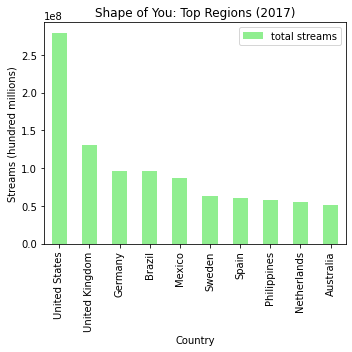

In [17]:
#create bar plot to show top 10 countries streams 
shape_10 = shape_top.plot.bar(x='region', y='total streams', figsize=(5, 5), width=.5, alpha=1, align="center", color = "lightgreen")

#add title
plt.title("Shape of You: Top Regions (2017)")

#label xaxis
plt.xlabel("Country")

#lable yaxis
plt.ylabel("Streams (hundred millions)")

#top_countries_plot.bar_label(top_countries["total streams"], label_type='edge')

#adjust graph layout 
plt.tight_layout()

#export chart to pngs
plt.savefig("Shape_Top_Ten_Countries.png")

#show graph 
plt.show()   

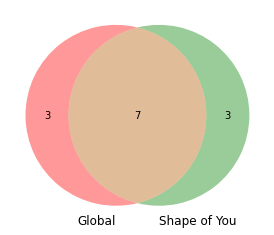

In [24]:
# # top_ten.compare(shape_top)
# top_ten.compare(shape_top,keep_shape=True, keep_equal=True)
venn2([set(top_ten.index), 
       set(shape_top['region'].to_list())],
       set_labels=('Global', 'Shape of You')
     )